In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as npl
import seaborn as sns
import statsmodels.api as sm
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from datetime import date
%matplotlib inline
from matplotlib import style
from scipy import stats
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.feature_selection import RFE

In [50]:
path = "/Users/pritigirishvankudre/Day7_BasicML/Weather Dataset/weather_data.csv"

weather_data = pd.read_csv(path)

In [51]:
# Creating the sample data from entire dataset with train size of 3% and random state 7

weather_data_samp = weather_data.sample(frac=0.03,random_state=7)
weather_data_samp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293375 entries, 6749680 to 6323796
Data columns (total 31 columns):
wsid    293375 non-null int64
wsnm    293375 non-null object
elvt    293375 non-null float64
lat     293375 non-null float64
lon     293375 non-null float64
inme    293375 non-null object
city    293375 non-null object
prov    293375 non-null object
mdct    293375 non-null object
date    293375 non-null object
yr      293375 non-null int64
mo      293375 non-null int64
da      293375 non-null int64
hr      293375 non-null int64
prcp    42154 non-null float64
stp     293375 non-null float64
smax    293375 non-null float64
smin    293375 non-null float64
gbrd    170003 non-null float64
temp    293374 non-null float64
dewp    293361 non-null float64
tmax    293375 non-null float64
dmax    293369 non-null float64
tmin    293375 non-null float64
dmin    293350 non-null float64
hmdy    293375 non-null float64
hmax    293375 non-null float64
hmin    293374 non-null float64
wds

In [52]:
# Checking for null values

#weather_data_samp.isnull().sum()
col_null = pd.DataFrame(weather_data_samp.isnull().sum()).reset_index()
col_null.columns = ['columns','null_cnt']
col_null['null_pct'] = round(col_null['null_cnt']/len(weather_data_samp)*100,2)
col_null

,columns,null_cnt,null_pct
0,wsid,0,0.00
1,wsnm,0,0.00
2,elvt,0,0.00
3,lat,0,0.00
4,lon,0,0.00
5,inme,0,0.00
6,city,0,0.00
7,prov,0,0.00
8,mdct,0,0.00
9,date,0,0.00


In [53]:
# Check unique values for each column

#weather_data_samp.nunique()
col_uniq = pd.DataFrame(weather_data_samp.nunique()).reset_index()
col_uniq.columns = ['columns','unique_cnt']
col_uniq['unique_pct'] = round(col_uniq['unique_cnt']/len(weather_data_samp)*100,2)
col_uniq

,columns,unique_cnt,unique_pct
0,wsid,122,0.04
1,wsnm,122,0.04
2,elvt,113,0.04
3,lat,121,0.04
4,lon,121,0.04
5,inme,121,0.04
6,city,117,0.04
7,prov,4,0.00
8,mdct,96794,32.99
9,date,5693,1.94


In [54]:
#dropping insignificant data based on intutive analysis

weather_data_samp.drop(['wsnm','city','mdct','date','inme'],axis=1,inplace=True)

In [55]:
# OHE for province

weather_data_samp = pd.get_dummies(weather_data_samp, columns=['prov'], drop_first=False)

In [56]:
weather_data_samp.head(5)

,wsid,elvt,lat,lon,yr,mo,da,hr,prcp,stp,...,hmdy,hmax,hmin,wdsp,wdct,gust,prov_ES,prov_MG,prov_RJ,prov_SP
6749680,383,7.0,-22.041647,-41.051871,2013,11,30,8,NaN,1012.7,...,88.0,88.0,88.0,5.1,23.0,9.1,0,0,1,0
62557,178,237.0,-6.835777,-38.311583,2014,12,25,13,NaN,988.1,...,40.0,45.0,39.0,4.0,97.0,8.0,0,0,1,0
3560751,341,853.0,-18.786842,-42.942921,2012,6,27,15,NaN,927.2,...,65.0,72.0,59.0,2.0,69.0,5.7,0,1,0,0
2127917,324,782.0,-20.745237,-46.633916,2016,7,4,5,NaN,934.1,...,86.0,90.0,84.0,NaN,269.0,1.4,0,1,0,0
5172079,361,877.0,-17.784770,-46.119394,2013,5,11,23,NaN,919.9,...,67.0,67.0,65.0,NaN,160.0,NaN,0,1,0,0


In [57]:
# Replace Null values with Mean of that particular year with respective column value.
# For Null in Temperature column if null is present for 2016 then replace that with mean temperature for year 2016.

In [58]:
#To check exact position of cell containing null and values for other columns containing nulls

#null_columns=weather_data_samp.columns[weather_data_samp.isnull().any()]
#print (weather_data_samp[weather_data_samp['hmin'].isnull()].index)
#print (weather_data_samp[weather_data_samp['hmin'].isnull()][null_columns])

#Int64Index([5647678], dtype='int64')'''
#prcp   gbrd  dewp  dmax  dmin  hmin  wdsp  gust'''
#5647678   NaN  989.0   0.0   0.0   0.0   NaN   3.7   8.2'''

In [59]:
def treat_null(unique_yr,weather_data_samp,null_col):
    print ("Replace Null values with Mean of that particular year with respective column value.")
    print ("Null Treatment for column name =",null_col)
    print ('*****************************************')
    mean_per_yr = []
    for i in unique_yr:
        mean_per_yr.append(round((weather_data_samp[weather_data_samp['yr'] == i][null_col].mean()),2))
    print ("Mean per year for "+null_col," =",mean_per_yr)
    print ('*****************************************')

    map_mean_per_yrs = {unique_yr[i]: mean_per_yr[i] for i in range(len(unique_yr))} 
    print ("Mean mapped to year for "+null_col," =",map_mean_per_yrs)
    print ('*****************************************')

    for i in map_mean_per_yrs:
        for j in weather_data_samp[weather_data_samp['yr'] == i]:
            weather_data_samp[null_col].fillna(map_mean_per_yrs.get(i), inplace=True)


null_columns=list(weather_data_samp.columns[weather_data_samp.isnull().any()])
print ("Columns containing Null Values =",null_columns)
print ('=============================================')
unique_yr = weather_data_samp['yr'].unique()
print ("Unique Year Values are :",unique_yr)
print ('=============================================')
for null_col in null_columns:
    treat_null(unique_yr,weather_data_samp,null_col)
print ('=============================================')
print ("Number of null values available =",weather_data_samp.isnull().sum().sum())

Columns containing Null Values = ['prcp', 'gbrd', 'temp', 'dewp', 'dmax', 'dmin', 'hmin', 'wdsp', 'gust']
Unique Year Values are : [2013 2014 2012 2016 2009 2015 2008 2011 2006 2005 2010 2001 2002 2007
 2004 2003 2000]
Replace Null values with Mean of that particular year with respective column value.
Null Treatment for column name = prcp
*****************************************
Mean per year for prcp  = [1.01, 0.87, 1.09, 0.72, 1.06, 0.9, 1.37, 1.12, 0.93, 0.54, 1.2, 0.61, 0.38, 0.9, 0.17, 0.4, 0.7]
*****************************************
Mean mapped to year for prcp  = {2013: 1.01, 2014: 0.87, 2012: 1.09, 2016: 0.72, 2009: 1.06, 2015: 0.9, 2008: 1.37, 2011: 1.12, 2006: 0.93, 2005: 0.54, 2010: 1.2, 2001: 0.61, 2002: 0.38, 2007: 0.9, 2004: 0.17, 2003: 0.4, 2000: 0.7}
*****************************************
Replace Null values with Mean of that particular year with respective column value.
Null Treatment for column name = gbrd
*****************************************
Mean per year

In [60]:
# Verify the revised columns

weather_data_samp.columns

Index(['wsid', 'elvt', 'lat', 'lon', 'yr', 'mo', 'da', 'hr', 'prcp', 'stp',
       'smax', 'smin', 'gbrd', 'temp', 'dewp', 'tmax', 'dmax', 'tmin', 'dmin',
       'hmdy', 'hmax', 'hmin', 'wdsp', 'wdct', 'gust', 'prov_ES', 'prov_MG',
       'prov_RJ', 'prov_SP'],
      dtype='object')

# EDA

1. Impact of province on temperature using histogram (to understand trend of temperature per year in each province)

==> It seems unusual dip of mean temperature in RJ and SP for the year 2004. Other than that, mean tempaerature seems to be distributed along the same range (approximately 20 degree celcius) through out four provinces.
More than Province, it seems year and month has a more significant relationship with Temperature.

2. Impact of elevation,lattitude and logitude on temperature (using scatter plot for upward or downward trend or random trend)

==> It seems negative trend between elevation and temperature. It seems lattitude and logitude do not make much impact on temperature as mean values are. Temperature clustered around a particular range of lattitude and longitude.

3. Impact of humidity and precipitation on temperature (using scatter plot for upward or downward or no trend)

==> It seems a negative trend between humidity and temperature. Temprature more or less remains around 20 degree celcius even with significant increase in precipitation.

4. Impact of Wind Speed and Wind Gust on Temperature. The analysis might also help to understand significance of Wind Direction on Temperature.

==> It seems curvilinear relation between Wind Speed and Wind Gust and Temperature Distribution. Temperature clustered around a particular range for any level of increase in Wind Direction.

5. Top 20 Temperature recorded weather station id wise for hr-day-month-yr wise. Bottom 20 Temperature recorded province wise and hr-day-month-yr wise.

==> Just to have a look at Weather Station Id where extreme high and low temperatures are recorded along with it's year and month.

6. Distribution of Outliers.

==> For the columns where I could see some level outliers (above 5%), I might not worry at this moment basis the assumption at that very instance might have created that genuine spike. At a later point if error in prediction is high we can revisit this point of Outliers Treatment.

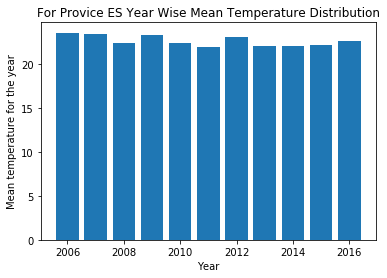

In [61]:
#Teperature Distribution Province wise per year

dataset = weather_data_samp[weather_data_samp['prov_ES'] == 1].copy()
unique = dataset['yr'].unique()

mean_yr = []
for i in unique:
    mean_yr.append(round((dataset[dataset['yr'] == i]['temp'].mean()),2))
    
plt.bar(unique,mean_yr)
plt.title("For Provice ES Year Wise Mean Temperature Distribution")
plt.xlabel('Year')
plt.ylabel('Mean temperature for the year')
plt.show()

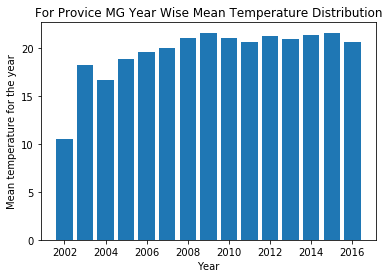

In [62]:
dataset = weather_data_samp[weather_data_samp['prov_MG'] == 1].copy()
unique = dataset['yr'].unique()

mean_yr = []
for i in unique:
    mean_yr.append(round((dataset[dataset['yr'] == i]['temp'].mean()),2))
    
plt.bar(unique,mean_yr)
plt.title("For Provice MG Year Wise Mean Temperature Distribution")
plt.xlabel('Year')
plt.ylabel('Mean temperature for the year')
plt.show()

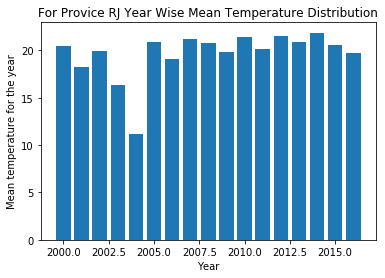

In [63]:
dataset = weather_data_samp[weather_data_samp['prov_RJ'] == 1].copy()
unique = list(dataset['yr'].unique())

mean_yr = []
for i in unique:
    mean_yr.append(round((dataset[dataset['yr'] == i]['temp'].mean()),2))
    
plt.bar(unique,mean_yr)
plt.title("For Provice RJ Year Wise Mean Temperature Distribution")
plt.xlabel('Year')
plt.ylabel('Mean temperature for the year')
plt.show()

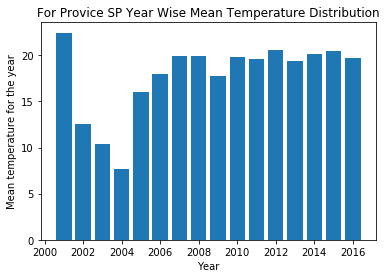

In [64]:
dataset = weather_data_samp[weather_data_samp['prov_SP'] == 1].copy()
unique = dataset['yr'].unique()

mean_yr = []
for i in unique:
    mean_yr.append(round((dataset[dataset['yr'] == i]['temp'].mean()),2))
    
plt.bar(unique,mean_yr)
plt.title("For Provice SP Year Wise Mean Temperature Distribution")
plt.xlabel('Year')
plt.ylabel('Mean temperature for the year')
plt.show()

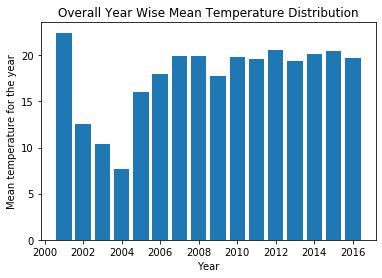

In [65]:
#Overall Temperature Disctriution month wise across all provinces.

unique = dataset['yr'].unique()

mean_yr = []
for i in unique:
    mean_yr.append(round((dataset[dataset['yr'] == i]['temp'].mean()),2))
    
plt.bar(unique,mean_yr)
plt.title("Overall Year Wise Mean Temperature Distribution")
plt.xlabel('Year')
plt.ylabel('Mean temperature for the year')
plt.show()

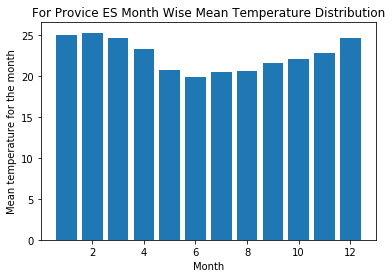

In [66]:
#Teperature Distribution Province wise per month across years

dataset = weather_data_samp[weather_data_samp['prov_ES'] == 1].copy()
unique = dataset['mo'].unique()

mean_yr = []
for i in unique:
    mean_yr.append(round((dataset[dataset['mo'] == i]['temp'].mean()),2))
    
plt.bar(unique,mean_yr)
plt.title("For Provice ES Month Wise Mean Temperature Distribution")
plt.xlabel('Month')
plt.ylabel('Mean temperature for the month')
plt.show()

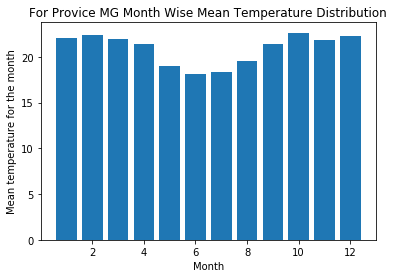

In [67]:
dataset = weather_data_samp[weather_data_samp['prov_MG'] == 1].copy()
unique = dataset['mo'].unique()

mean_yr = []
for i in unique:
    mean_yr.append(round((dataset[dataset['mo'] == i]['temp'].mean()),2))
    
plt.bar(unique,mean_yr)
plt.title("For Provice MG Month Wise Mean Temperature Distribution")
plt.xlabel('Month')
plt.ylabel('Mean temperature for the month')
plt.show()

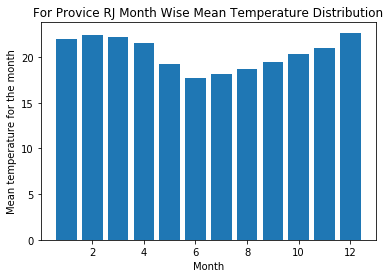

In [68]:
dataset = weather_data_samp[weather_data_samp['prov_RJ'] == 1].copy()
unique = dataset['mo'].unique()

mean_yr = []
for i in unique:
    mean_yr.append(round((dataset[dataset['mo'] == i]['temp'].mean()),2))
    
plt.bar(unique,mean_yr)
plt.title("For Provice RJ Month Wise Mean Temperature Distribution")
plt.xlabel('Month')
plt.ylabel('Mean temperature for the month')
plt.show()

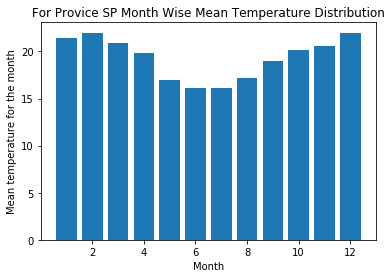

In [69]:
dataset = weather_data_samp[weather_data_samp['prov_SP'] == 1].copy()
unique = dataset['mo'].unique()

mean_yr = []
for i in unique:
    mean_yr.append(round((dataset[dataset['mo'] == i]['temp'].mean()),2))
    
plt.bar(unique,mean_yr)
plt.title("For Provice SP Month Wise Mean Temperature Distribution")
plt.xlabel('Month')
plt.ylabel('Mean temperature for the month')
plt.show()

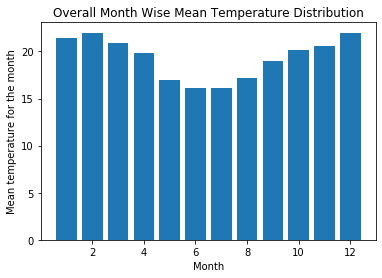

In [70]:
#Overall Temperature Disctriution month wise across all provinces.

unique = dataset['mo'].unique()

mean_yr = []
for i in unique:
    mean_yr.append(round((dataset[dataset['mo'] == i]['temp'].mean()),2))
    
plt.bar(unique,mean_yr)
plt.title("Overall Month Wise Mean Temperature Distribution")
plt.xlabel('Month')
plt.ylabel('Mean temperature for the month')
plt.show()

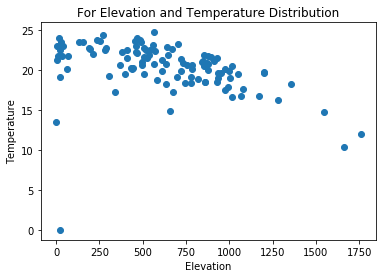

In [71]:
# Impact of elevtion, lattitude and longitude on temperature

unique = weather_data_samp['elvt'].unique()

mean_temp = []
for i in unique:
    mean_temp.append(round((weather_data_samp[weather_data_samp['elvt'] == i]['temp'].mean()),2))


plt.scatter(unique,mean_temp)
plt.title("For Elevation and Temperature Distribution")
plt.xlabel('Elevation')
plt.ylabel('Temperature')
plt.show()

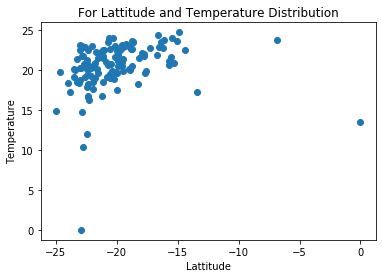

In [72]:
unique = weather_data_samp['lat'].unique()

mean_temp = []
for i in unique:
    mean_temp.append(round((weather_data_samp[weather_data_samp['lat'] == i]['temp'].mean()),2))


plt.scatter(unique,mean_temp)
plt.title("For Lattitude and Temperature Distribution")
plt.xlabel('Lattitude')
plt.ylabel('Temperature')
plt.show()

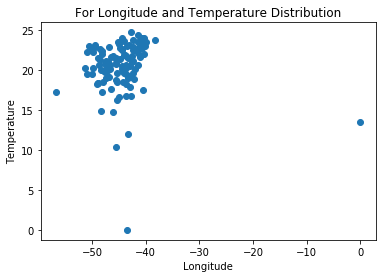

In [73]:
unique = weather_data_samp['lon'].unique()

mean_temp = []
for i in unique:
    mean_temp.append(round((weather_data_samp[weather_data_samp['lon'] == i]['temp'].mean()),2))


plt.scatter(unique,mean_temp)
plt.title("For Longitude and Temperature Distribution")
plt.xlabel('Longitude')
plt.ylabel('Temperature')
plt.show()

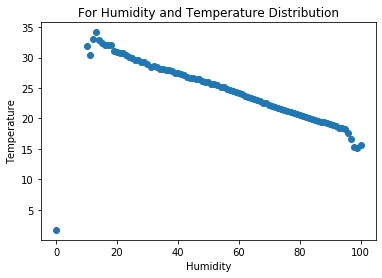

In [74]:
# Impact of Humidity and Precipitation on Temperature

unique = weather_data_samp['hmdy'].unique()

mean_temp = []
for i in unique:
    mean_temp.append(round((weather_data_samp[weather_data_samp['hmdy'] == i]['temp'].mean()),2))


plt.scatter(unique,mean_temp)
plt.title("For Humidity and Temperature Distribution")
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.show()

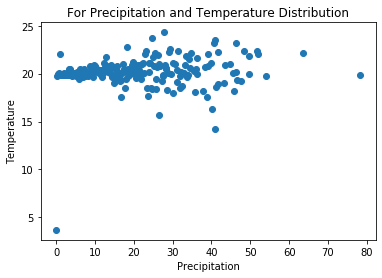

In [75]:
unique = weather_data_samp['prcp'].unique()

mean_temp = []
for i in unique:
    mean_temp.append(round((weather_data_samp[weather_data_samp['prcp'] == i]['temp'].mean()),2))


plt.scatter(unique,mean_temp)
plt.title("For Precipitation and Temperature Distribution")
plt.xlabel('Precipitation')
plt.ylabel('Temperature')
plt.show()

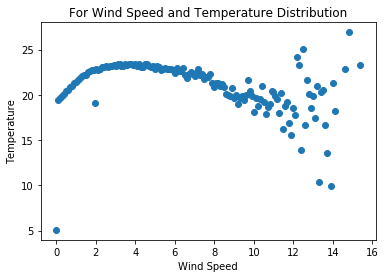

In [76]:
# Impact of Wind Speed and Wind Gust on Temperature

unique = weather_data_samp['wdsp'].unique()

mean_temp = []
for i in unique:
    mean_temp.append(round((weather_data_samp[weather_data_samp['wdsp'] == i]['temp'].mean()),2))


plt.scatter(unique,mean_temp)
plt.title("For Wind Speed and Temperature Distribution")
plt.xlabel('Wind Speed')
plt.ylabel('Temperature')
plt.show()

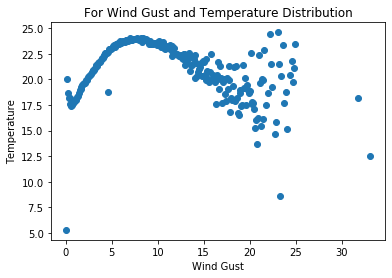

In [77]:
unique = weather_data_samp['gust'].unique()

mean_temp = []
for i in unique:
    mean_temp.append(round((weather_data_samp[weather_data_samp['gust'] == i]['temp'].mean()),2))


plt.scatter(unique,mean_temp)
plt.title("For Wind Gust and Temperature Distribution")
plt.xlabel('Wind Gust')
plt.ylabel('Temperature')
plt.show()

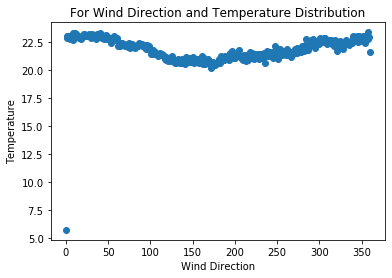

In [78]:
unique = weather_data_samp['wdct'].unique()

mean_temp = []
for i in unique:
    mean_temp.append(round((weather_data_samp[weather_data_samp['wdct'] == i]['temp'].mean()),2))


plt.scatter(unique,mean_temp)
plt.title("For Wind Direction and Temperature Distribution")
plt.xlabel('Wind Direction')
plt.ylabel('Temperature')
plt.show()

In [79]:
# Top 20 highest temaperature recorded Weather Station wise for a aprticular year and month.

weather_data_samp[['wsid','yr','mo','temp']].sort_values('temp',axis=0,ascending=False).head(20)

,wsid,yr,mo,temp
4696938,355,2014,1,44.9
742360,311,2012,3,41.1
9713666,422,2014,10,40.2
4007833,347,2008,11,40.0
742458,311,2012,3,39.5
4712136,355,2015,9,39.4
8821804,410,2014,10,39.3
4060057,347,2014,10,39.3
4069251,347,2015,11,39.3
4070088,347,2015,12,39.3


In [80]:
# Bottom 20 highest temaperature recorded Weather Station wise for a aprticular year and month.

weather_data_samp[['wsid','yr','mo','temp']].sort_values('temp',axis=0,ascending=True).head(20)

,wsid,yr,mo,temp
8197769,403,2011,6,-3.2
1445259,317,2011,8,-2.6
1445962,317,2011,9,-1.5
3432344,339,2016,7,-0.9
7379273,394,2016,6,-0.8
1435088,317,2010,6,-0.7
3415497,339,2014,8,-0.6
8241254,403,2016,6,-0.6
1444347,317,2011,6,-0.6
1463073,317,2013,8,-0.6


In [81]:
# To identify outliers in the dataset

def get_outliers(self):
        a_list = []
        per_75 = np.percentile(self,75)
        per_25 = np.percentile(self,25)
        iqr = per_75-per_25
        tot_75 = per_75 + (1.5*iqr)
        tot_25 = per_25 - (1.5*iqr)
        a_list1 = np.array(self).tolist()
        for j in a_list1:
            if j > tot_75:
                a_list.append(j)
            if j < tot_25:
                a_list.append(j)
        return a_list

for i in weather_data_samp:
    outliers = get_outliers(weather_data_samp[i])
    print ("Total outliers in Column",weather_data_samp[i].name," =",len(outliers))
    print ("Percentatge of outliers in Column",weather_data_samp[i].name," =",round(((len(outliers)/weather_data_samp.shape[0])*100),2))
    print ("** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** **")

Total outliers in Column wsid  = 2287
Percentatge of outliers in Column wsid  = 0.78
** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** **
Total outliers in Column elvt  = 0
Percentatge of outliers in Column elvt  = 0.0
** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** **
Total outliers in Column lat  = 4474
Percentatge of outliers in Column lat  = 1.53
** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** **
Total outliers in Column lon  = 2187
Percentatge of outliers in Column lon  = 0.75
** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** **
Total outliers in Column yr  = 513
Percentatge of outliers in Column yr  = 0.17
** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** **
Total outliers in Column mo  = 0
Percentatge of outliers in Column mo  = 0.0
** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** **
Total outliers in Column da  = 0
Percentatge of outliers in Column da  = 0.0
** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** **
Total outliers in Column hr  = 0
Percentatge of outliers in Column hr  = 0.0


# Feature Enginerring

1. Converting categorical column to integer by multiplying with mean of temperature

In [82]:
#Transforming categorical column into integer

weather_data_samp['wsid_temp_mean'] = weather_data_samp.groupby('wsid')['temp'].transform('mean')

#and dropping original wsid column

weather_data_samp.drop('wsid', axis=1, inplace=True)

In [83]:
weather_data_samp.columns

Index(['elvt', 'lat', 'lon', 'yr', 'mo', 'da', 'hr', 'prcp', 'stp', 'smax',
       'smin', 'gbrd', 'temp', 'dewp', 'tmax', 'dmax', 'tmin', 'dmin', 'hmdy',
       'hmax', 'hmin', 'wdsp', 'wdct', 'gust', 'prov_ES', 'prov_MG', 'prov_RJ',
       'prov_SP', 'wsid_temp_mean'],
      dtype='object')

# Feature Selection

In [84]:
# Correlation with Temperature

weather_data_samp.corrwith(weather_data_samp['temp'])

elvt             -0.223658
lat               0.092519
lon              -0.013714
yr                0.088687
mo               -0.016835
da               -0.003368
hr                0.286819
prcp              0.154568
stp               0.699843
smax              0.697952
smin              0.697828
gbrd              0.426164
temp              1.000000
dewp              0.651178
tmax              0.992292
dmax              0.683789
tmin              0.991137
dmin              0.618841
hmdy              0.154639
hmax              0.200112
hmin              0.127799
wdsp              0.338544
wdct              0.238900
gust              0.452835
prov_ES           0.077636
prov_MG           0.053186
prov_RJ          -0.004064
prov_SP          -0.100342
wsid_temp_mean    0.368093
dtype: float64

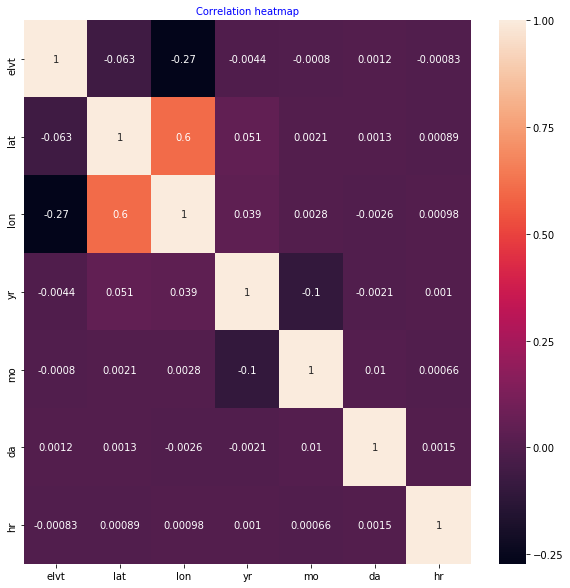

In [85]:
# Drop features with multicolinearity

fig = plt.figure(figsize=(10, 10))
sns.heatmap(weather_data_samp[['elvt','lat','lon','yr','mo','da','hr']].corr(), annot=True)
plt.title('Correlation heatmap', fontsize=10, color='blue')
plt.show()

# longitude to drop since comparatively lattitude more corelated to temperature

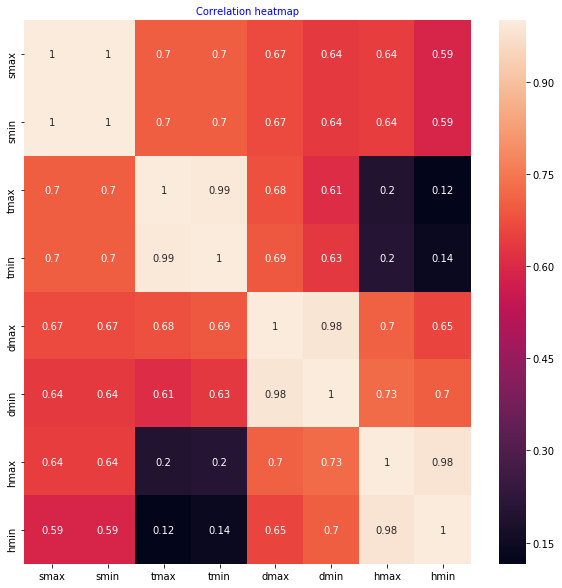

In [86]:
fig = plt.figure(figsize=(10, 10))
sns.heatmap(weather_data_samp[['smax','smin','tmax','tmin','dmax','dmin','hmax','hmin']].corr(), annot=True)
plt.title('Correlation heatmap', fontsize=10, color='blue')
plt.show()

#between smin and smax, any one can be dropped hence I will drop smin
#between tmin and tmax, any one can be dropped hence I will drop tmin
#between dmin and dmax, any one can be dropped hence I will drop tmin
#but since even t, d and s are also highly corelated (greater than 0.6) will keep only tmax
#between hmin and hmax, any one can be dropped hence I will drop hmin

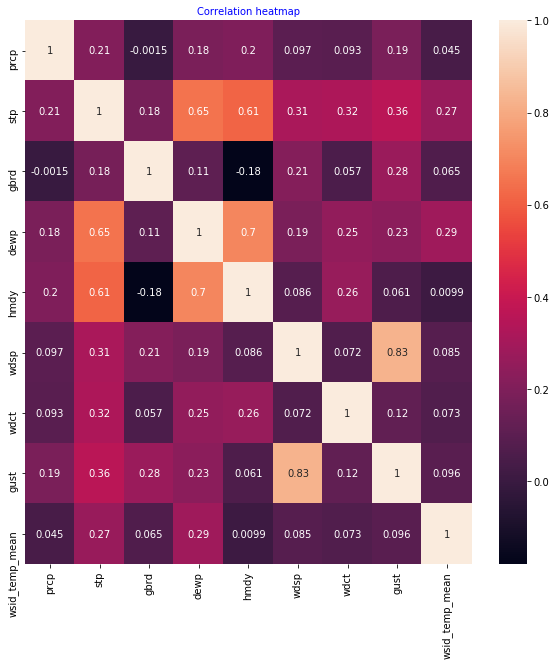

In [87]:
fig = plt.figure(figsize=(10, 10))
sns.heatmap(weather_data_samp[['prcp','stp','gbrd','dewp','hmdy','wdsp','wdct','gust','wsid_temp_mean']].corr(), annot=True)
plt.title('Correlation heatmap', fontsize=10, color='blue')
plt.show()

#between hmdy and dewp, I will keep dewp since it is more corelated with temperature and I will drop hmdy

In [88]:
# dropping columns

weather_data_samp.drop(['lon', 'smax', 'smin', 'dmax', 'tmin', 'dmin', 'hmin', 'hmdy'], axis=1, inplace=True)
weather_data_samp.columns

Index(['elvt', 'lat', 'yr', 'mo', 'da', 'hr', 'prcp', 'stp', 'gbrd', 'temp',
       'dewp', 'tmax', 'hmax', 'wdsp', 'wdct', 'gust', 'prov_ES', 'prov_MG',
       'prov_RJ', 'prov_SP', 'wsid_temp_mean'],
      dtype='object')

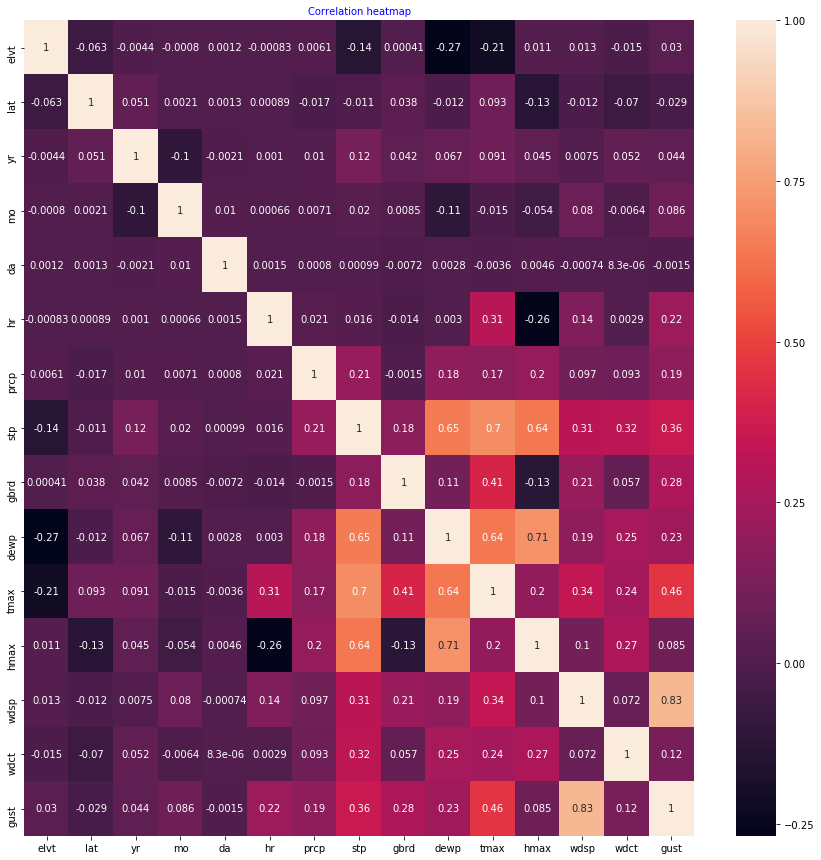

In [89]:
fig = plt.figure(figsize=(15, 15))
sns.heatmap(weather_data_samp[['elvt', 'lat', 'yr', 'mo', 'da', 'hr', 'prcp', 'stp', 'gbrd', 'dewp', 'tmax', 'hmax', 'wdsp', 'wdct', 'gust']].corr(), annot=True)
plt.title('Correlation heatmap', fontsize=10, color='blue')
plt.show()

#between wdsp and gust, I will drop wdsp
#will also remove dewp and stp

In [90]:
# dropping columns

weather_data_samp.drop(['wdsp', 'stp', 'dewp'], axis=1, inplace=True)
weather_data_samp.columns

Index(['elvt', 'lat', 'yr', 'mo', 'da', 'hr', 'prcp', 'gbrd', 'temp', 'tmax',
       'hmax', 'wdct', 'gust', 'prov_ES', 'prov_MG', 'prov_RJ', 'prov_SP',
       'wsid_temp_mean'],
      dtype='object')

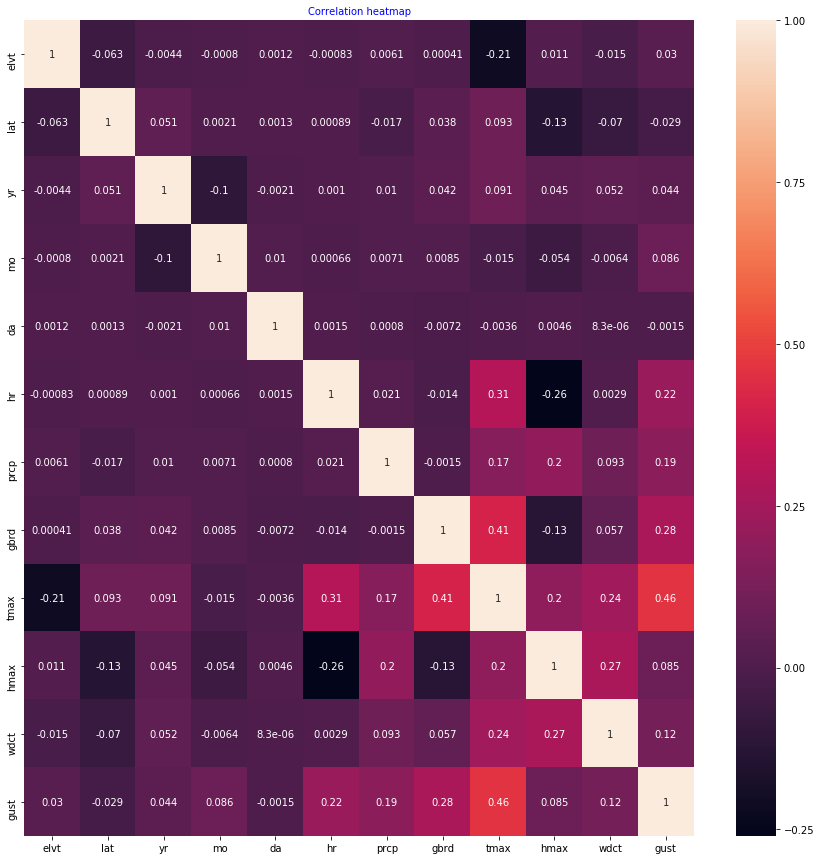

In [91]:
fig = plt.figure(figsize=(15, 15))
sns.heatmap(weather_data_samp[['elvt', 'lat', 'yr', 'mo', 'da', 'hr', 'prcp', 'gbrd', 'tmax', 'hmax', 'wdct', 'gust']].corr(), annot=True)
plt.title('Correlation heatmap', fontsize=10, color='blue')
plt.show()

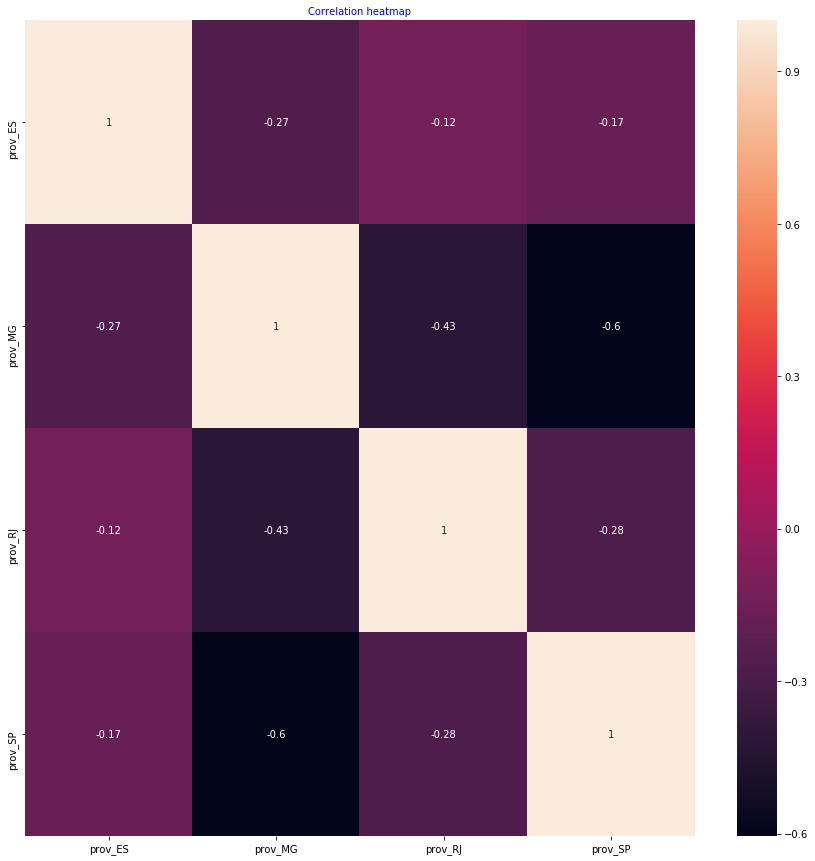

In [92]:
fig = plt.figure(figsize=(15, 15))
sns.heatmap(weather_data_samp[['prov_ES', 'prov_MG', 'prov_RJ', 'prov_SP']].corr(), annot=True)
plt.title('Correlation heatmap', fontsize=10, color='blue')
plt.show()

In [93]:
# Create X and y

X = weather_data_samp.drop(['temp'], axis=1)
y = weather_data_samp['temp']

In [94]:
# Use RFE for feature selection for Linear Regression Algorithm
from sklearn.feature_selection import RFE
lr = LinearRegression()
rfe = RFE(lr, 15)
rfe.fit(X, y)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=15, step=1, verbose=0)

In [95]:
sel_cols = []
for a, b, c in zip(rfe.support_, rfe.ranking_, X.columns):
    print(a, b, c)
    if b == 1:
        sel_cols.append(c)

False 3 elvt
True 1 lat
True 1 yr
True 1 mo
True 1 da
True 1 hr
True 1 prcp
True 1 gbrd
True 1 tmax
True 1 hmax
False 2 wdct
True 1 gust
True 1 prov_ES
True 1 prov_MG
True 1 prov_RJ
True 1 prov_SP
True 1 wsid_temp_mean


In [96]:
print(sel_cols)

['lat', 'yr', 'mo', 'da', 'hr', 'prcp', 'gbrd', 'tmax', 'hmax', 'gust', 'prov_ES', 'prov_MG', 'prov_RJ', 'prov_SP', 'wsid_temp_mean']


In [97]:
# Creating new DF of X

X_sel = X[sel_cols]

# Preparing Model

#R-squared is a goodness-of-fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale. After fitting a regression model, you need to determine how well the model fits the data. 

#The RMSE is the square root of the variance of the residuals. It indicates the absolute fit of the model to the data–how close the observed data points are to the model’s predicted values. Whereas R-squared is a relative measure of fit, RMSE is an absolute measure of fit. As the square root of a variance, RMSE can be interpreted as the standard deviation of the unexplained variance, and has the useful property of being in the same units as the response variable. Lower values of RMSE indicate better fit. RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction.

In [98]:
# Split data in to train and test

X_train, X_test, y_train, y_test = train_test_split(X_sel, y, train_size=0.7, random_state=7)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print ("R squared value =",lr.score(X_train,y_train))
print ("RMSE value =",rmse(y_pred,y_test))

R squared value = 0.9857811577886268
RMSE value = 0.8724303966633721


In [99]:
# Use RFE for feature selection for RandomForest Regression Algorithm
rf = RandomForestRegressor()
rfe = RFE(rf, 15)
rfe.fit(X, y)

/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RFE(estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                    max_depth=None, max_features='auto',
                                    max_leaf_nodes=None,
                                    min_impurity_decrease=0.0,
                                    min_impurity_split=None, min_samples_leaf=1,
                                    min_samples_split=2,
                                    min_weight_fraction_leaf=0.0,
                                    n_estimators='warn', n_jobs=None,
                                    oob_score=False, random_state=None,
                                    verbose=0, warm_start=False),
    n_features_to_select=15, step=1, verbose=0)

In [100]:
sel_cols = []
for a, b, c in zip(rfe.support_, rfe.ranking_, X.columns):
    print(a, b, c)
    if b == 1:
        sel_cols.append(c)

True 1 elvt
True 1 lat
True 1 yr
True 1 mo
True 1 da
True 1 hr
True 1 prcp
True 1 gbrd
True 1 tmax
True 1 hmax
True 1 wdct
True 1 gust
False 3 prov_ES
True 1 prov_MG
False 2 prov_RJ
True 1 prov_SP
True 1 wsid_temp_mean


In [101]:
print(sel_cols)

['elvt', 'lat', 'yr', 'mo', 'da', 'hr', 'prcp', 'gbrd', 'tmax', 'hmax', 'wdct', 'gust', 'prov_MG', 'prov_SP', 'wsid_temp_mean']


In [102]:
# Split data in to train and test

X_train, X_test, y_train, y_test = train_test_split(X_sel, y, train_size=0.7, random_state=7)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print ("R squared value =",rf.score(X_train,y_train))
print ("RMSE value =",rmse(y_pred,y_test))

/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


R squared value = 0.998608999502193
RMSE value = 0.6650415593337746
